### Import needed modules

In [ ]:
#!pip install selenium
#!pip install Pillow

In [1]:
import selenium
from selenium import webdriver
import time
import requests
import io
import random
from PIL import Image
import os
import hashlib

### Helper functions

In [2]:
def scroll(wd, interval):
	wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
	time.sleep(interval)

def get_urls(query_word, number_images, wd, sleep_between_interactions):
	api = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"
	wd.get(api.format(q = query_word.replace('_',' ')))

	urls = set()
	start_point = 0
	trap = 5
	cur = 0
	retry = 20
	while len(urls) < number_images and trap > 0 and retry > 0:
		scroll(wd, sleep_between_interactions)
		try:
			thumbnails = wd.find_elements_by_css_selector("img.rg_i")
		except Exception:
			continue
		num_thumbnails = len(thumbnails)
		print(type(thumbnails))
		print(f"Located: {num_thumbnails} results")

		for thumbnail in thumbnails[start_point:len(thumbnails)]:
			try:
				thumbnail.click()
				time.sleep(sleep_between_interactions)
				wd.switch_to.window(wd.window_handles[0])
			except Exception as e:
				print(e)
				continue
			try:
				previews = wd.find_elements_by_css_selector("img.rg_i")
			except Exception:
				continue
			for preview in previews:
				src = preview.get_attribute('src')
				if src != None:
					urls.add(src)

			if len(urls) >= number_images:
				break

		if len(urls) >= number_images:
			print(f"Collected: {len(urls)} urls, finished")
			break
		else:
			print(f"Collected: {len(urls)} urls, continue..")
			if (cur == len(urls)):
				retry -= 1
			cur = cur + len(urls)
			if (len(urls) == 0):
				trap -= 1
			time.sleep(1)
			try:
				button = wd.find_element_by_css_selector(".ksb")
			except Exception:
				continue
			if button != None:
				wd.execute_script("document.querySelector('.ksb').click();")
		start_point = len(thumbnails)
	return urls


def save_imgs_from_url(folder_path:str,url:str):
	try:
		image_content = requests.get(url).content

	except Exception as e:
		print(f"ERROR - Could not download {url} - {e}")

	try:
		image_file = io.BytesIO(image_content)
		image = Image.open(image_file).convert('RGB')
		file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
		with open(file_path, 'wb') as f:
			image.save(f, "JPEG", quality=85)
		print(f"SUCCESS - saved {url} - as {file_path}")
	except Exception as e:
		print(f"ERROR - Could not save {url} - {e}")
        
        
def search_and_download(search_term:str, driver_path:str, target_path='./images', number_images=5):
	target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

	if not os.path.exists(target_folder):
		os.makedirs(target_folder)

	with webdriver.Chrome(executable_path=driver_path) as wd:
		urls = get_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
	for url in urls:
		save_imgs_from_url(target_path,url)

## Actual Scaping of Images

In [3]:
# This is the path I use
# DRIVER_PATH = '.../Desktop/Scraping/chromedriver 2'
# Put the path for your ChromeDriver here
DRIVER_PATH = '/Users/ldalessi/FAST_AI/Scraping/chromedriver'  # where you put the chromedriver executable

<class 'list'>
Located: 100 results
Collected: 102 urls, finished
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRW5UkXvo9fsx2xwJQ6q_G5rrlzifkJyaxIg4-NsanRpTXNmA-i - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/6962f65996.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQZFU2ZQfaNbuntqSNf2O_GcGxf9Ni7sahA7ulbgkmQcLjBKQMn - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/7e6244855e.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQznGLlV3oy_M4RRlI5LLfel2XPjBoFm2JUbJ8xMeD_ebZqUoHs - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/5ca3bb2836.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSuIiprocdNNNfWr7krDd2MWTPwSbUKj4bBKKaVtS-vB7DLMSWo - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/b6c0778921.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTKDPYpyavG1OP2nzInRm7Vpz-aVVEiaMGVafqhVSWgXP85BD7z - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/58e9c598ae.jpg
SUCCESS - save
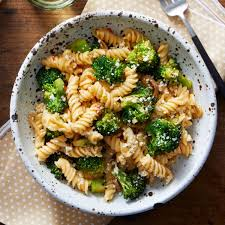
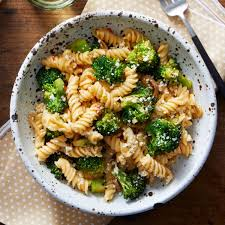
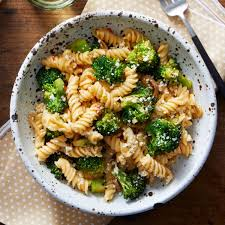
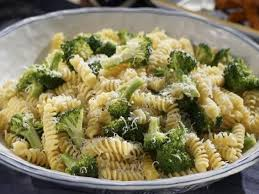
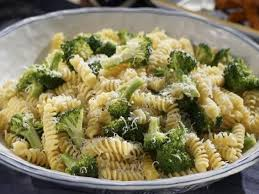
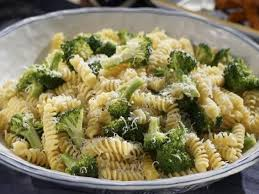
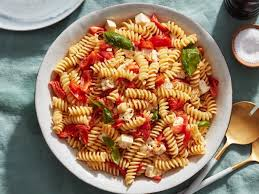
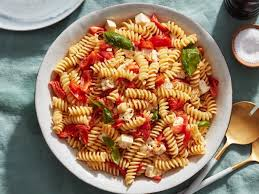
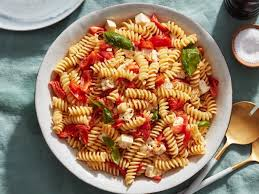
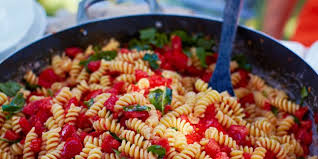
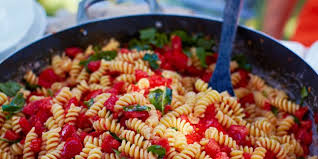
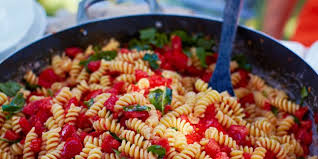

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRWp6L1N3TxP0ggFRARJp4s7gFXTpf4xpun6H8OUweafjV2aW6r - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/ec26b35cf3.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTW9LXYCg1H2DB48wUHf88IItKi9Q50asWNKrggPjdL2A-SctgF - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/fc1bcb33a2.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRPJRM4ItSAykScbs1w3i6Cxj_NwQP9CbyTC0gi8rXobw3D1X03 - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/d9d3ba0d3b.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSq4LlDugG-u5zu7pO5HxMJ8xYd7YtL0DKO6b38aYzY7irDvRw6 - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/f239be2bf0.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT-_ZNyYerf9gbSFydjL6nbT3nc8knEtzvuy0f4ok-vZRJfrXtb - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/508dfa3833.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRVvEgulz
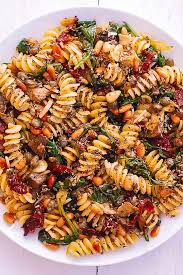
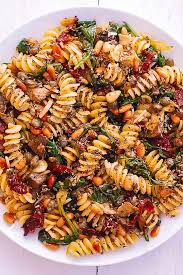
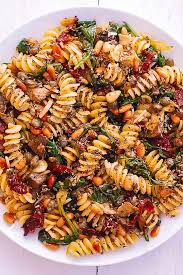

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRFj9CkteHId2qGbzJDWgA3_lKxRUeFH4bnZN6LUP326bp6H7vt - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/feddcf3b48.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTrjiknENgFF8NGzsLJJeeIrZ4ZGRirRHbq1sKr91kv4albaZOb - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/e4afecaf02.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSlDjlFD5MOFQgCruiilNDRvtLekTSbteAlqMes-CsZsyPugXAG - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/6ed3529cbc.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSDkTFVs8N9E3r4jjG3ncwNMw_E9WhXyzx09fJT7O-gKdEUegz4 - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/be50be4cb9.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQVkh5DDy0ArLdinLm_5_uAwRjvT2I1Xbw9VO29vkeXrbJaqmjP - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/ad3a4c2436.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQLQE50hS
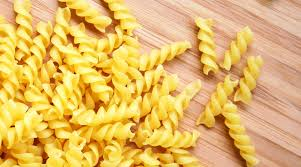
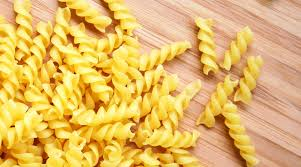
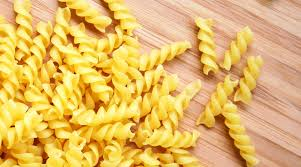

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSOLzzTngAl6o-kB7CLLS5-z86GTEPsYL7rYMQFk2Zi0qlLo-vJ - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/d2d35fb678.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRDL8pemhbEcuSqdqIuZIQNeEfWfM5ahfAQZWyZXL7g9BbrkS6D - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/107864b48d.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSmXivmYltjLgIiLbwAXFSdQrEp6EqaEPivHv41uph1tsSLCEss - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/9a5207659c.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRNdsgL7e5IKKECwgwG_bI3dcOc409zQmqa88k6S7tM7y2T2fjy - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/c22ce99091.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTBIPWiuB1BBRJCMkzFKG0CgE5DaHfkN04UERRLGBZwwspXt4Ev - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/fa7733a455.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQKC1Eg1u
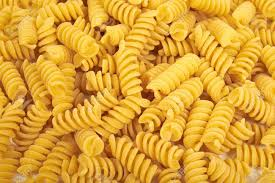
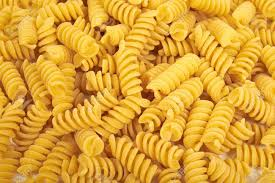
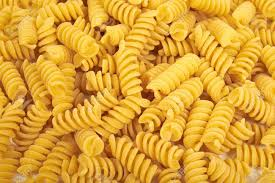
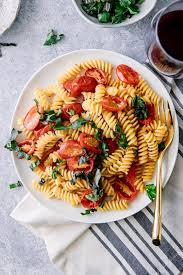
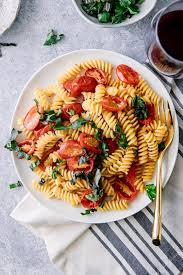
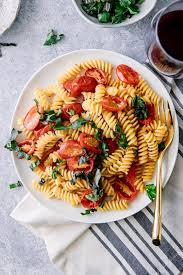

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSpjNVkcl8P69NmeeBwRyGglBNrdbvzTczBj_YIpJEIkc2Ptb4i - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/a781642400.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT8RLn9vcrufLTDqbz8LZwk0o_hr2luEI9picMTRhvNgVMLbxxs - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/3f3d597d63.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQOtTpiE-i9XAkvkQTvmfJklORgi-aHtSFfzxa5hMLVTa5dIKDt - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/0da39cd867.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTUEcPwyiAaZxGdW9vtkfXHTMJMJLFjg0cly51qW3UCBa22f348 - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/e278e9c80c.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQsDlTbn4leoJCPJN8h0CBjA94Ub46e14X0_zFynkV1bsyh_cla - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/a9876daffb.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQJu1fWMo
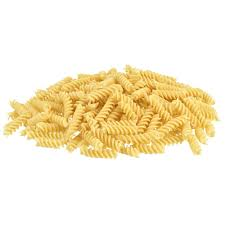
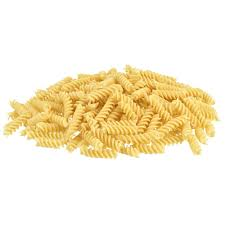
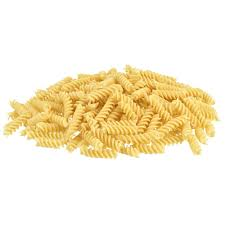

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTk44ZT1W22QF1AucJJ5GuxulLc74BK8UGcMkmdZkcPlq3604mF - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/f35b9cd974.jpg
ERROR - Could not download  - No connection adapters were found for ''
ERROR - Could not save  - local variable 'image_content' referenced before assignment
ERROR - Could not download  - No connection adapters were found for ''
ERROR - Could not save  - local variable 'image_content' referenced before assignment
ERROR - Could not download  - No connection adapters were found for ''
ERROR - Could not save  - local variable 'image_content' referenced before assignment
ERROR - Could not download  - No connection adapters were found for ''
ERROR - Could not save  - local variable 'image_content' referenced before assignment
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRdvkpCiuQwPvhCtDlbYTUiuv7V6s2Hr5F3k1ruEsDTu9mGtNSZ - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/34030a3fa4.jpg
SUCC
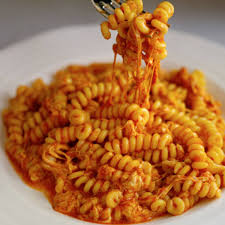
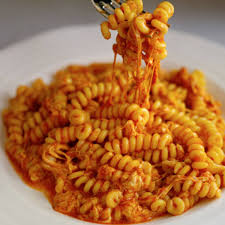
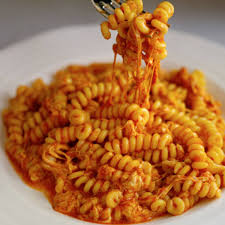
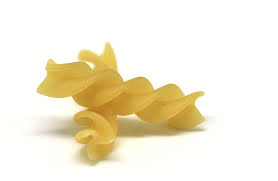
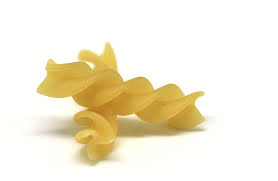
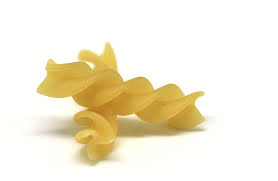
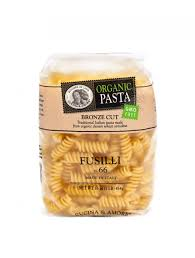
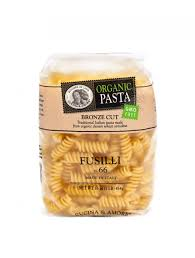
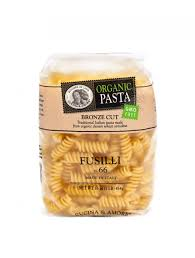
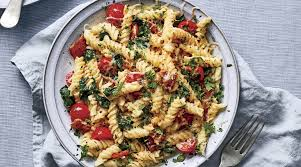
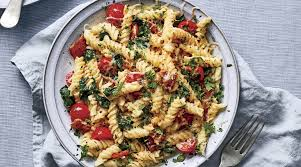
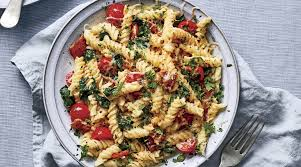

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSZEyIwPx5p-eNRW2eSGklYdiSfUv5AaqpufC5MLdwXSBcIg9UF - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/6a405009a4.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRgmmvEhGNUDuN4QE4TBMCyOs_1u5gnbRi7X0GeUONwok0N1RkD - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/14308160a5.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSw4ClbnYrjkgEifKpKs3o2fGgUDIwtVWt_QI3ZrB2Kbnb0HgVW - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/c625aaff3e.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQgYzVXTgVo8FOqK7AyJ6xhI-_ybozu3jwllPTqHgQ8Tc-X75SP - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/4c2f54b66a.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS0sA2xFSa1b0YnmEy-o-EZZtz9q77SLZXZtPZ4vEfrcY9TPsRy - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/4e41ee8682.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSCnmgaAn
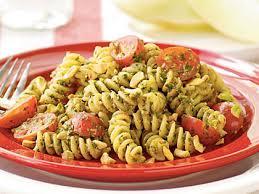
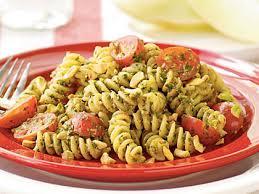
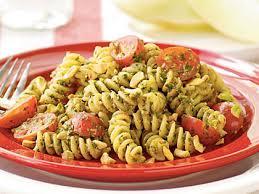
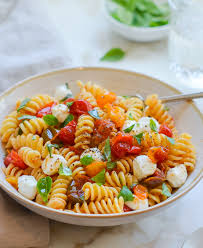
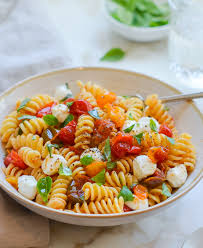
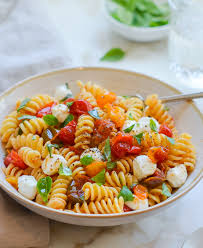

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTjCyUYPi_Yz5fgxXAaHgK3Qk_oGaO3E-GsTFcOk0NCN_CKUXi8 - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/998c9a7110.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS0x0ctRaBA08b8hsFDJWDTcDdEZHWR28HZFNXyvoUGFltczwSS - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/1f392571e0.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR25GKZHU5T9rVKegH_jdLeTDKDj7ppCtwD7CK6ZSgRP7s9SIPy - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/54d6e5ef50.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRITn5Re32gFgPVa97YTafTpMSjdEfBtZzwNKwsfcnRCm4f7jWD - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/29a767e43c.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRGaBdyRHzGtbcqHAEjq5DjWcZw0G829ozSY76c4dbul8JokFkZ - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/1810fe21dc.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQCYXCL1A
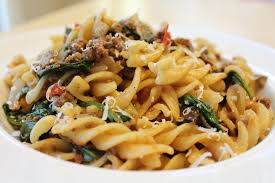
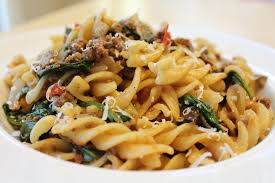
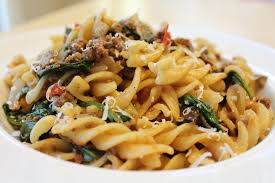

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ1HEvlNdoIy8XSed68IQ7WDea59UxKqwm_zuo-6XVaaMjNSFLF - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/9d4e2976bd.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRjRhFCF6HMC7WM6EApPrBq7aqpAuADmPrLrCSk5mUW4wMmDYT9 - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/4ab1871d94.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRhrpVG9LnkcnigmPFUO0a0HRGBCCIDMgFUhVoVS6FN96uVaTAk - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/9327bb046c.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRRRAkt22ydEhPWU46VJ1-jlVsy13tL-t25z4ujwXvG1DWyPPO3 - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/7cdf3c1576.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQgoCJkxYaONiWNn3gYDTZnhuwt5IM17A0QRdmoDaVvVLxImIYk - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/3345e96dee.jpg
ERROR - Could not download  - No connection adapters were found for ''
ERROR - C
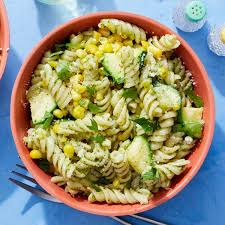
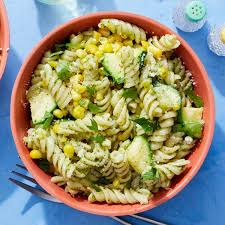
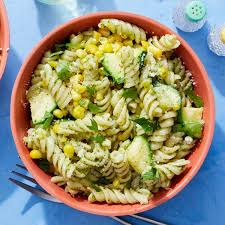

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRdZ_HS1KGtovUUdEmC6x1zzLOz-Za4NKTEGnQAZr0bOIVQZCED - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/fc68459a85.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSVwhl0DAop492xXbTWg_1FrKkFo7dFPJrr8e-pYHUqw2pmBzLc - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/0d1e353fd0.jpg
ERROR - Could not download  - No connection adapters were found for ''
ERROR - Could not save  - local variable 'image_content' referenced before assignment
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRDqHuZ0oZznj-hnvkKn0zIJo0Ms_9IoLKfNwzHvgwKJKO_GGqX - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/1ea7ac1378.jpg

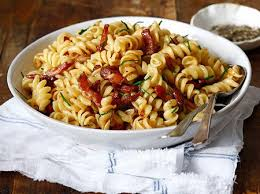
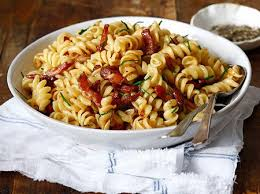
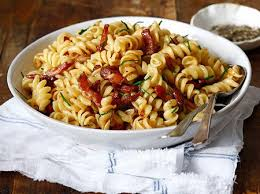

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTLM8Jp-BM8-sHUMIOWTF0ul1-WL4fkKbx4JoooMOoZKWX7RKec - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/5a461249d0.jpg
ERROR - Could not download  - No connection adapters were found for ''
ERROR - Could not save  - local variable 'image_content' referenced before assignment
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQKEQz31R421KGwylTIUwOs2RK17WVlwsYLffeOTlZZGzVEGGD0 - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/ce8e53328f.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS3ABCgUR8d93KR4cO7fw_glTCdlzoZKL--4yV1OB6_bvt2NmiI - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/b30228eb7c.jpg

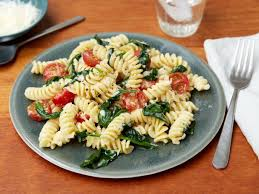
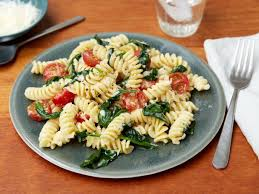
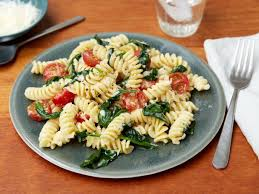

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTGWwo_HmL9uJJfvbAgBzhX-RXxbfoXRgs-GQScFMm4qM_HTmoo - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/1dd4f5e2dd.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQO9QfUWCQClaxhlrvBbbSP8fnvGAKXUpbyXEDQXYyd1RU6pl1V - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/42eef5abbb.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRsjEUeTcAgGMwt0wEOGXQm0D10GMUBmTBR76dlzvZmzgDxT7Pq - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/aeab171fad.jpg
ERROR - Could not download  - No connection adapters were found for ''
ERROR - Could not save  - local variable 'image_content' referenced before assignment

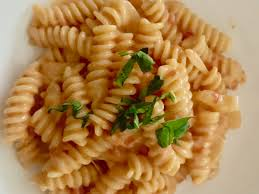
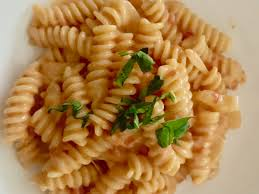
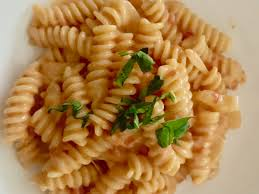

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT0DwbM2hsaDViEq9mRGcV7t_VGLriXBD68-qwLg54Jwz6AdxNF - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/275af48362.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQcc-goE9BlPJCZ3jHCk-l0k--ICxXTJuTYxkEWz33N0uccU38G - as /Users/ldalessi/FAST_AI/Scraping/Fusilli/0e546635d6.jpg


In [5]:
TARGET_PATH = '/Users/ldalessi/FAST_AI/Scraping/Fusilli/'  # where you want to save the images
search_term="fusilli pasta"
number_images=10
search_and_download(search_term, DRIVER_PATH, TARGET_PATH, number_images=5)